# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.style.use('seaborn')
np.random.seed(5)

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(f'shape of X: {X.shape}')
print(f'shape of y: {y.shape}')

shape of X: (150, 4)
shape of y: (150,)


載入相關套件並執行 hierarchical clustering 實驗 ...

參考資料:[台灣人工智慧學校](https://medium.com/ai-academy-taiwan/clustering-method-4-ed927a5b4377)

參考資料:[Mr. Opengate](https://mropengate.blogspot.com/2015/06/ai-ch17-6-clustering-hierarchical.html)

定義兩個群聚之間的距離
- 單一連結聚合演算法(single-linkage agglomerative algorithm)：群聚與群聚間的距離可以定義為不同群聚中最接近兩點間的距離。
- 完整連結聚合演算法(complete-linkage agglomerative algorithm）：群聚間的距離定義為不同群聚中最遠兩點間的距離，這樣可以保證這兩個集合合併後, 任何一對的距離不會大於 d。
- 平均連結聚合演算法(average-linkage agglomerative algorithm)：群聚間的距離定義為不同群聚間各點與各點間距離總和的平均。
- 沃德法（Ward's method）：群聚間的距離定義為在將兩群合併後，各點到合併後的群中心的距離平方和。

In [3]:
# use different linkage criterion
estimators = [('hc_ward', AgglomerativeClustering(n_clusters = 3, linkage = 'ward')),
              ('hc_complete', AgglomerativeClustering(n_clusters = 3, linkage = 'complete')),
              ('hc_average', AgglomerativeClustering(n_clusters = 3, linkage = 'average'))]

畫出散佈圖

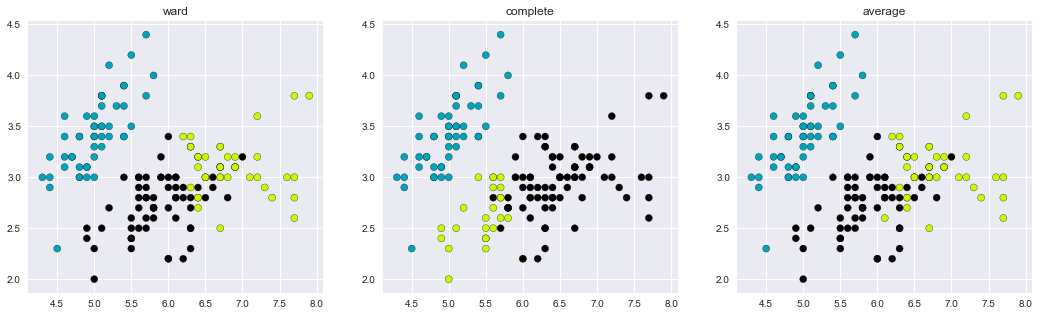

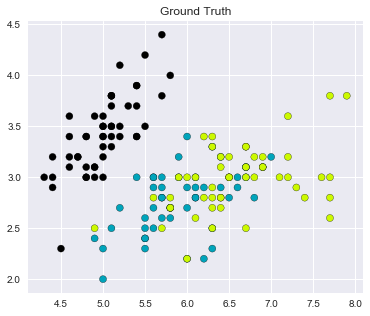

In [4]:
fignum = 1
titles = ['ward', 'complete', 'average']
plt.figure(figsize = (18, 5))

for name, est in estimators:
    
    plt.subplot(1, 3, fignum)
    ## fit data
    est.fit(X)
    labels = est.labels_
    colors = cm.nipy_spectral(labels.astype(float) / 3)
    plt.scatter(X[:, 0], X[:, 1], c = colors, edgecolor = 'k')
    plt.title(titles[fignum - 1])
    
    fignum = fignum + 1
    
plt.show()

plt.figure(figsize = (6, 5))
colors = cm.nipy_spectral(y.astype(float) / 3)
plt.scatter(X[:, 0], X[:, 1], c = colors, edgecolor = 'k')
plt.title('Ground Truth')
plt.show()

畫出階層分群圖

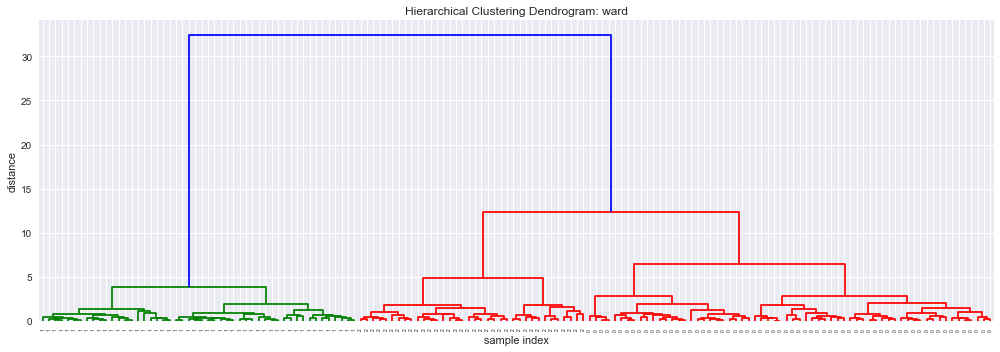

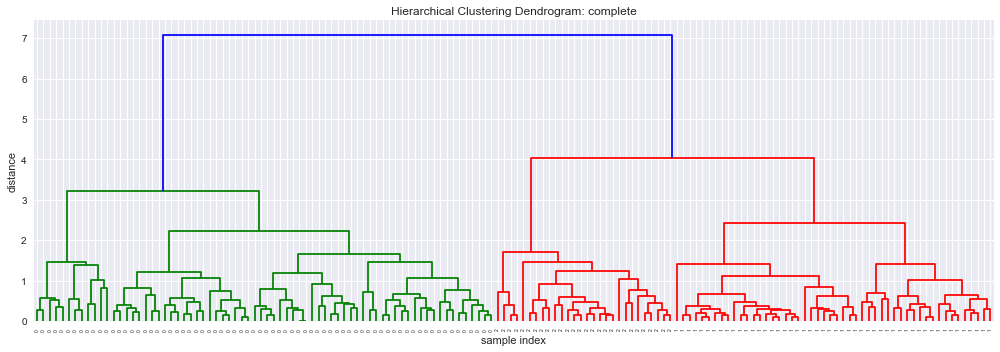

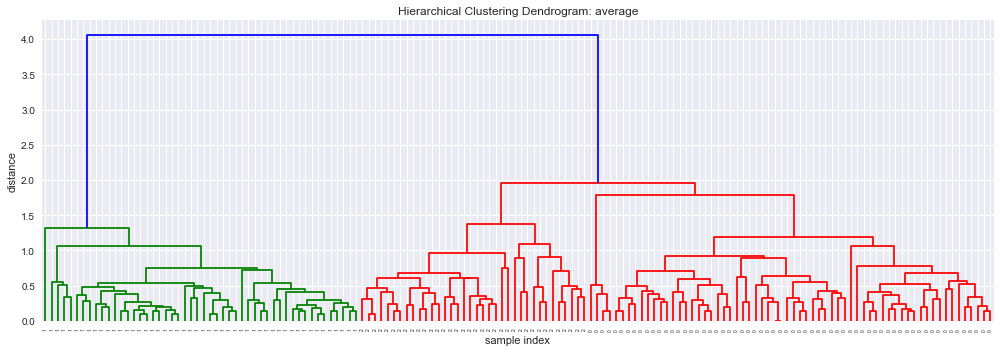

In [5]:
for i in range(len(titles)):
    linkage_matrix = linkage(X, titles[i])
    figure = plt.figure(figsize = (14, 5))
    # Plots the dendrogram
    labels = estimators[i][1].fit(X).labels_
    dendrogram(linkage_matrix, labels = labels)
    plt.title('Hierarchical Clustering Dendrogram: %s'% titles[i])
    plt.xlabel('sample index')
    plt.ylabel('distance')
    plt.tight_layout()
    plt.show()